### 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate!)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)



----------------------------------------------------
## My implementation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from tqdm.notebook import tqdm

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15


###  MC integration


$$ 
\int_\infty^\infty N(0, \sigma) dx = 2 \int_0^\infty N(0, \sigma) dx =  
  \sqrt{\frac{2}{\pi}}\frac{1}{\sigma} \int_0^\infty  \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 1
$$

Thus,

$$ 
\int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 
\sigma\sqrt{\frac{\pi}{2}} \int_0^\infty x^3 N(0, \sigma).
$$

$$
\Longrightarrow result_{MC} = \sigma\sqrt{\frac{\pi}{2}}\frac{1}{N}\sum_{i=1, ..., N}x_{i}^{3}
$$

We extract {xi} from half a gaussian (since the integral goes from 0 to $\infty$) and use them to compute $\frac{1}{N}\Sigma_{i=1...N}x_{i}^{3}$

In [2]:
def MCresult(mu, sigma, N):
    xi = np.abs(stats.norm(loc = mu, scale = sigma).rvs(N))         #data extracted from half a gaussian
    norm = sigma * (np.pi/2)**0.5
    return norm * sum((xi)**3)/N

Text(0.5, 1.0, 'Sample of 10000 data generated from half a gaussian')

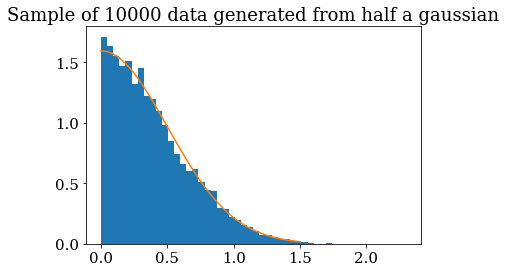

In [3]:
# Gaussian 
sigma = 0.5                                            
mu = 0
Gauss = stats.norm(mu, sigma)


# fit the sample to check if it's right
xi = np.abs(stats.norm(loc = mu, scale = sigma).rvs(10000))   
plt.hist(xi, bins=50, density=True);                   #let's see if it is normalized
plt.plot(np.linspace(0, 3*sigma), 2 * Gauss.pdf(np.linspace(0, 3*sigma)))   #times 2 since we did the absolute
plt.title('Sample of 10000 data generated from half a gaussian')

In [4]:
# Results from MC
n = np.unique(np.logspace(1, 5, 100, dtype=int))     #array with different population sizes
result = np.array([MCresult(mu, sigma, N) for N in tqdm(n)])

#exact result of the integral
I = 2*sigma**4        

print(result, I)

  0%|          | 0/99 [00:00<?, ?it/s]

[0.09583831 0.06396156 0.05701096 0.06932859 0.12738961 0.09596353
 0.11312475 0.17707167 0.10707628 0.1260262  0.10993795 0.13129907
 0.14249522 0.07927342 0.26605598 0.12026988 0.11118875 0.14191781
 0.15708371 0.12133364 0.10272727 0.08744948 0.21508933 0.10946088
 0.12158738 0.11142581 0.12857177 0.13889    0.14059104 0.08376837
 0.08500912 0.14698974 0.13572721 0.11067234 0.12963955 0.13616174
 0.1158242  0.11688336 0.11894966 0.11895091 0.11822209 0.12144147
 0.1042752  0.12330232 0.112072   0.11414552 0.12428925 0.12769506
 0.119522   0.11995992 0.12826433 0.11960843 0.12270257 0.12310125
 0.12417214 0.12377592 0.12176317 0.13173581 0.13191789 0.12926052
 0.12931753 0.12766791 0.13410271 0.12801852 0.11737565 0.12852096
 0.13069499 0.12999108 0.13037891 0.1268391  0.12487592 0.1213385
 0.12828545 0.12651876 0.12682972 0.12730157 0.12761236 0.12566633
 0.12334528 0.1280895  0.12534157 0.12201652 0.12536074 0.1262675
 0.12588314 0.12688225 0.12344964 0.12451888 0.12354273 0.126328

### Check if the results converge

We divide the extact result by the MC result and see if it converges to 1 as N grows

Text(0.5, 1.0, 'convergence of the two results')

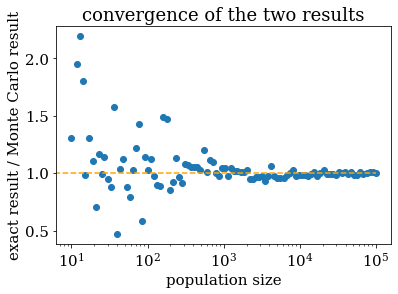

In [14]:
plt.scatter(n, I/result)
plt.hlines(1, 0, 10**5, color='orange', linestyle='--')
plt.semilogx()
plt.xlabel('population size')
plt.ylabel('exact result / Monte Carlo result')
plt.title('convergence of the two results')

### 3. How does the error go down?

It should go as $1/\sqrt{N}$. Let's check

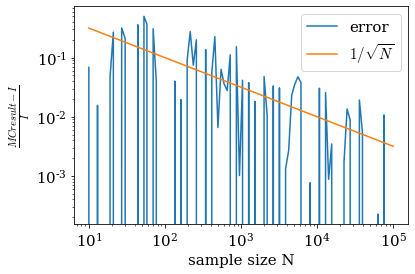

In [37]:
error = (result-I)/I
plt.plot(n, error, label='error')
plt.loglog()
plt.plot(n, n**-0.5, label=r'$1/\sqrt{N}$')
plt.legend()
plt.ylabel(r'$\frac{MCresult-I}{I}$')
plt.xlabel('sample size N');

### Increase the number of results Nr and see how the distribution of results changes

In [45]:
N = 1000       #influences the sample from which are extracted the xi
Nr = 10000    
result = np.array([MCresult(mu, sigma, N) for i in tqdm(range(Nr))])

  0%|          | 0/10000 [00:00<?, ?it/s]

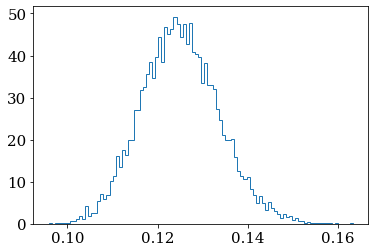

In [46]:
plt.hist(result, density=True, histtype='step', bins = 100);

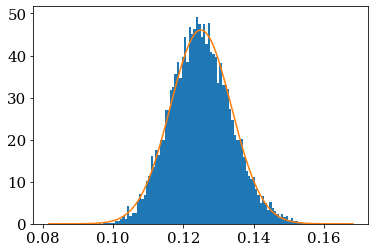

In [47]:
plt.hist(result, density=True, bins = 100);
mean = np.mean(result)
std = np.std(result)

x = np.linspace(mean-5*std, mean+5*std, 1000)
plt.plot(x, stats.norm(mean, std).pdf(x))